In [64]:
!pip install openpyxl

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Ejercicio 1

In [65]:
datos = pd.read_excel('wind_data.xlsx')
print(datos)

       dia  regional wind  wind gap norte sur
0        1       8.000000            0.000000
1        2       8.346296            0.181523
2        3      10.062316            0.188643
3        4      10.791337            0.071085
4        5      10.754093            0.078442
...    ...            ...                 ...
3645  3646       8.642231           -0.869425
3646  3647       6.527408           -1.268447
3647  3648       6.230707           -1.149234
3648  3649       5.550882           -0.420431
3649  3650       6.545450            0.250088

[3650 rows x 3 columns]


In [66]:
datos['wind dif'] = datos['regional wind'] - datos['regional wind'].shift(1)
print(datos)

       dia  regional wind  wind gap norte sur  wind dif
0        1       8.000000            0.000000       NaN
1        2       8.346296            0.181523  0.346296
2        3      10.062316            0.188643  1.716019
3        4      10.791337            0.071085  0.729021
4        5      10.754093            0.078442 -0.037244
...    ...            ...                 ...       ...
3645  3646       8.642231           -0.869425  0.940298
3646  3647       6.527408           -1.268447 -2.114824
3647  3648       6.230707           -1.149234 -0.296701
3648  3649       5.550882           -0.420431 -0.679825
3649  3650       6.545450            0.250088  0.994568

[3650 rows x 4 columns]


In [67]:
datos_filtrados = datos.dropna(subset=['wind dif'])

slope, intercept, r_value, p_value, std_err = stats.linregress(datos_filtrados['dia'], datos_filtrados['wind dif'])

beta_1 = slope
beta_0 = intercept

print('beta_0:', beta_0)
print('beta_1:', beta_1)

beta_0: -0.002552164882229644
beta_1: 1.1793804766925413e-06


In [68]:
kappa = -365 * beta_1 #PREGUNTAR SI ES MENOS O MÁS
print('kappa:', kappa)

kappa: -0.0004304738739927776


In [86]:
sigma = std_err/np.sqrt(1/365)

In [70]:
datos['gap dif'] = datos['wind gap norte sur'] - datos['wind gap norte sur'].shift(1)
print(datos)

       dia  regional wind  wind gap norte sur  wind dif   gap dif
0        1       8.000000            0.000000       NaN       NaN
1        2       8.346296            0.181523  0.346296  0.181523
2        3      10.062316            0.188643  1.716019  0.007120
3        4      10.791337            0.071085  0.729021 -0.117558
4        5      10.754093            0.078442 -0.037244  0.007358
...    ...            ...                 ...       ...       ...
3645  3646       8.642231           -0.869425  0.940298  0.185931
3646  3647       6.527408           -1.268447 -2.114824 -0.399021
3647  3648       6.230707           -1.149234 -0.296701  0.119213
3648  3649       5.550882           -0.420431 -0.679825  0.728803
3649  3650       6.545450            0.250088  0.994568  0.670518

[3650 rows x 5 columns]


In [71]:
datos_filtrados_gap = datos.dropna(subset=['gap dif'])

slope_gap, intercept_gap, r_value_gap, p_value_gap, std_err_gap = stats.linregress(datos_filtrados_gap['dia'], datos_filtrados_gap['gap dif'])

beta_1_gap = slope_gap
beta_0_gap = intercept_gap

print('beta_0:', beta_0_gap)
print('beta_1:', beta_1_gap)

beta_0: -8.662160282027568e-05
beta_1: 8.497127690939294e-08


In [72]:
beta = -365 * beta_1_gap
beta

-3.101451607192842e-05

In [87]:
gamma = std_err_gap/np.sqrt(1/365)

## Ejercicio 2

In [74]:
def theta(t):
    return 6 + 2 * np.cos(2 * np.pi * t / 365)

In [107]:
def simulacion ():
    caminos_S = []
    caminos_D = []

    for m in range(1000):
        S = np.zeros(365)
        D = np.zeros(365)

        # Valores iniciales (suponemos que S_0 y D_0 son conocidos o se dan como 0)
        S[0] = np.mean(datos['regional wind'])
        D[0] = 0

        for i in range(1, 365):
            S[i] = S[i - 1] + kappa * (theta(i) - S[i - 1]) * 1/365 + sigma * np.sqrt(1/365) * np.random.normal(0, 1)
            
            D[i] = D[i-1] - beta * D[i-1] * 1/365 + gamma * np.sqrt(1/365) * np.random.normal(0, 1)

        caminos_S.append(S)
        caminos_D.append(D)
    return caminos_S, caminos_D

In [108]:
caminos_S, caminos_D = simulacion()

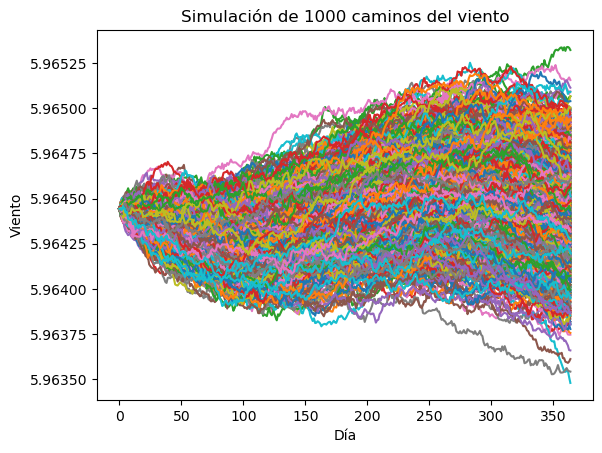

In [109]:
for i in range(1000):
    plt.plot(caminos_S[i])

plt.title('Simulación de 1000 caminos del viento')
plt.xlabel('Día')
plt.ylabel('Viento')
plt.show()
#PREGUNTAR LO DEL GEOMETRIC WALK

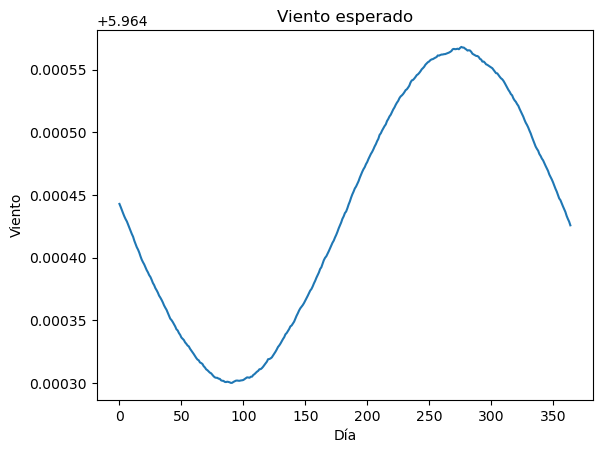

In [110]:
viento_esperado = np.mean(caminos_S, axis=0)
plt.plot(viento_esperado)
plt.title('Viento esperado')
plt.xlabel('Día')
plt.ylabel('Viento')
plt.show()

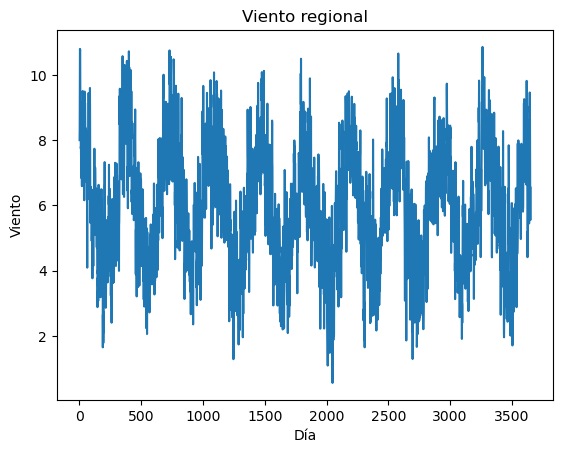

In [78]:
plt.plot(datos['dia'], datos['regional wind'])
plt.title('Viento regional')
plt.xlabel('Día')
plt.ylabel('Viento')
plt.show()

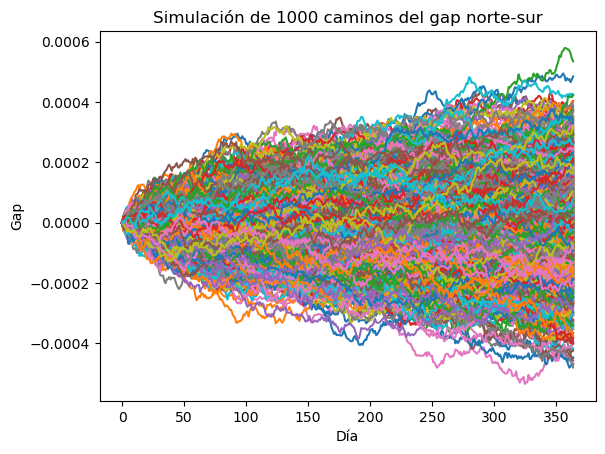

In [111]:
for i in range(1000):
    plt.plot(caminos_D[i])
plt.title('Simulación de 1000 caminos del gap norte-sur')
plt.xlabel('Día')
plt.ylabel('Gap')
plt.show()

In [113]:
#Viento en molino norte
S_norte = (caminos_S+caminos_D)/2

plt.plot(S_norte)
plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'int'

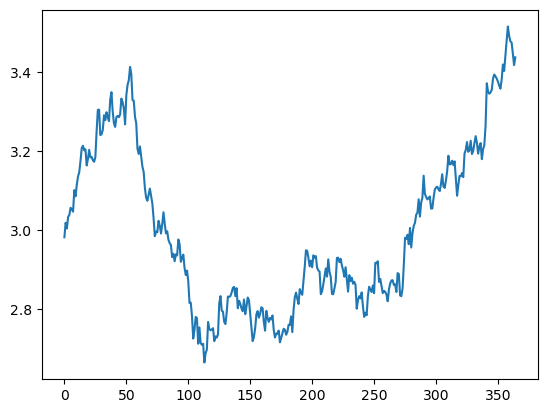

In [81]:
S_sur = (S-D)/2

plt.plot(S_sur)
plt.show()

Media del viento simulado: 5.035815704015994
Desviación estándar del viento simulado: 0.4727733749215235
Media del viento histórico: 5.964442822277723
Desviación estándar del viento histórico: 1.8032133987250791
Media de la diferencia simulada: 0.33270377323328926
Desviación estándar de la diferencia simulada: 0.12823800335122632
Media de la diferencia histórica: -0.0003986161317890626
Desviación estándar de la diferencia histórica: 0.9109632735972384


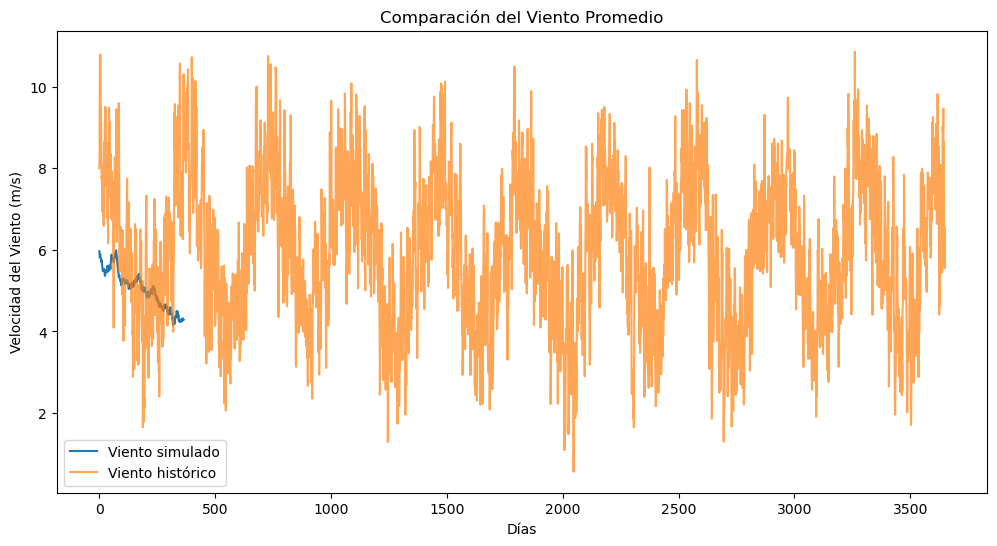

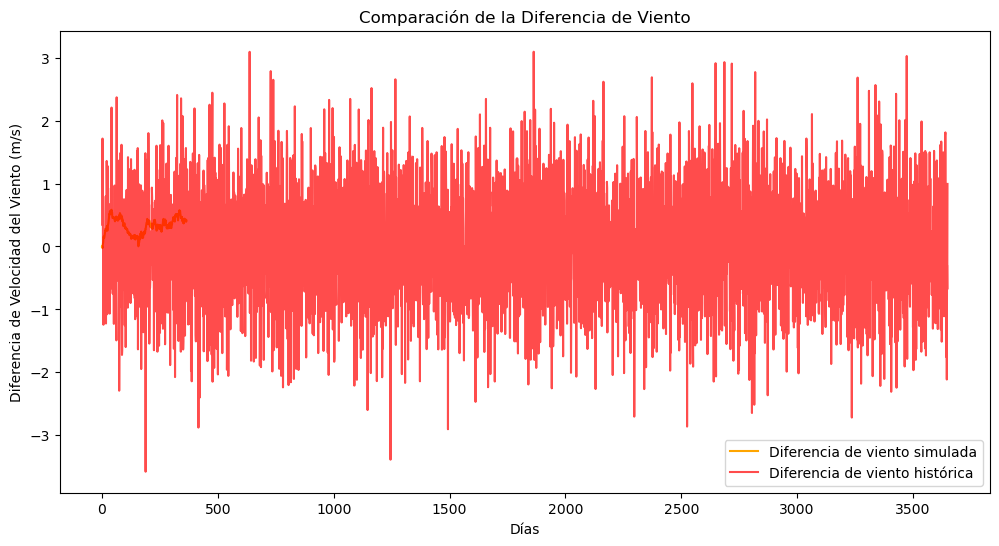

In [114]:
# Supongamos que tienes datos históricos de 'wind' y 'wind dif'
historical_wind = datos['regional wind']  # Reemplaza con la columna correcta
historical_wind_dif = datos['wind dif']

# Comparación de la media y desviación estándar
print(f"Media del viento simulado: {np.mean(S)}")
print(f"Desviación estándar del viento simulado: {np.std(S)}")
print(f"Media del viento histórico: {np.mean(historical_wind)}")
print(f"Desviación estándar del viento histórico: {np.std(historical_wind)}")

# Similar para la diferencia de viento
print(f"Media de la diferencia simulada: {np.mean(D)}")
print(f"Desviación estándar de la diferencia simulada: {np.std(D)}")
print(f"Media de la diferencia histórica: {np.mean(historical_wind_dif)}")
print(f"Desviación estándar de la diferencia histórica: {np.std(historical_wind_dif)}")

# Gráfico comparativo
plt.figure(figsize=(12, 6))
plt.plot(S, label='Viento simulado')
plt.plot(historical_wind, label='Viento histórico', alpha=0.7)
plt.title('Comparación del Viento Promedio')
plt.xlabel('Días')
plt.ylabel('Velocidad del Viento (m/s)')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(D, label='Diferencia de viento simulada', color='orange')
plt.plot(historical_wind_dif, label='Diferencia de viento histórica', color='red', alpha=0.7)
plt.title('Comparación de la Diferencia de Viento')
plt.xlabel('Días')
plt.ylabel('Diferencia de Velocidad del Viento (m/s)')
plt.legend()
plt.show()


## Ejercicio 3


In [115]:
# Definición de variables iniciales
K = np.mean(datos['regional wind'])  # Umbral de apagado/encendido
n_days = 365
r = 0.05  # Tasa de interés anual para el descuento de cashflows

# Inicialización de listas para almacenar resultados
caminos_S = []
caminos_D = []
cashflows_totales = []

for m in range(1000):  # 1000 simulaciones
    S = np.zeros(n_days)
    D = np.zeros(n_days)
    estado_molino = np.ones(n_days)  # 1 = activo, 0 = inactivo
    cashflow = np.zeros(n_days)

    # Valores iniciales
    S[0] = np.mean(datos['regional wind'])
    D[0] = 0

    for i in range(1, n_days):
        # Evolución del viento regional y la diferencia de viento
        S[i] = S[i - 1] + kappa * (theta(i) - S[i - 1]) * 1/365 + sigma * np.sqrt(1/365) * np.random.normal(0, 1)
        D[i] = D[i-1] - beta * D[i-1] * 1/365 + gamma * np.sqrt(1/365) * np.random.normal(0, 1)
        # Decisión de apagado o encendido
        if estado_molino[i-1] == 1 and S[i] > K:
            estado_molino[i] = 0
            cashflow[i] -= 1000  # Costo de apagar el molino
        elif estado_molino[i-1] == 0 and S[i] <= K:
            estado_molino[i] = 1
        
        # Evaluar si hay rotura
        if estado_molino[i] == 1:
            prob_rotura = 0.25 * (S[i]**2) * (1/365)
            if np.random.rand() < prob_rotura:
                estado_molino[i] = 0  # Molino roto
                cashflow[i] -= 200000  # Costo de reparación

        # Calcular ingresos
        if estado_molino[i] == 1:
            cashflow[i] += 1000 * S[i]
            print(cashflow[i])
    
    # Descuento de cashflows para obtener el VAN para esta simulación
    VAN = np.sum(cashflow * np.exp(-r * np.arange(n_days) / 365))
    cashflows_totales.append(VAN)

    # Almacenar las trayectorias
    caminos_S.append(S)
    caminos_D.append(D)

# Calcular el VAN promedio
VAN_promedio = np.mean(cashflows_totales)
print(f"VAN Promedio (Valor Actual Neto): {VAN_promedio:.2f}")

5964.433390960214
5964.436443377919
5964.4165026259225
5964.395230777736
5964.391548598372
5964.392070600424
5964.380704348455
5964.3983196566805
5964.396500203108
5964.397875180803
5964.405592496935
5964.412372356938
5964.381436553785
5964.373111453805
5964.383949640492
5964.388646063769
5964.40011387776
5964.395216816756
5964.376007485755
5964.368086424508
5964.354396480762
5964.340885975652
5964.316040357269
5964.337750978986
5964.332665131238
5964.358381426324
5964.379938756929
5964.385930968255
5964.362104189953
5964.344061203248
5964.365926286624
5964.3434063536915
5964.358937060901
5964.362979077706
5964.347147084242
5964.347158811778
5964.3607655892565
5964.3753148076785
5964.367910293812
5964.361538141032
5964.360199445712
5964.365091199572
5964.3745680222
5964.363538592927
5964.38278446465
5964.377988993413
5964.370907610089
5964.363602991831
5964.376650017756
5964.386419513777
5964.381346613222
5964.393968289312
5964.376214161644
5964.361561163789
5964.367291298628
5964.3795

In [116]:
plt.plot(viento_molino1, label = 'Molino 1')
plt.plot(viento_molino2, label = 'Molino 2')
plt.show()

NameError: name 'viento_molino1' is not defined

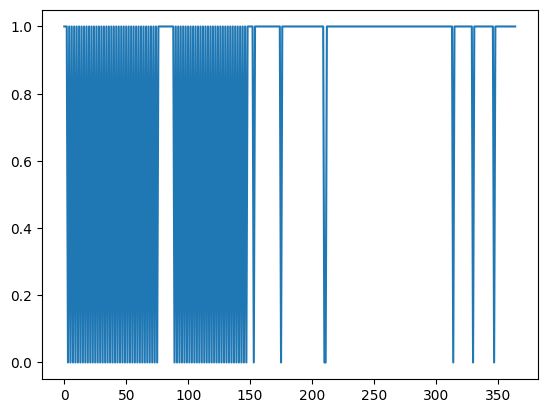

In [ ]:
plt.plot(estado_molino, label = 'Molino 1')
#plt.plot(estado_molino2, label = 'Molino 2')

plt.show()

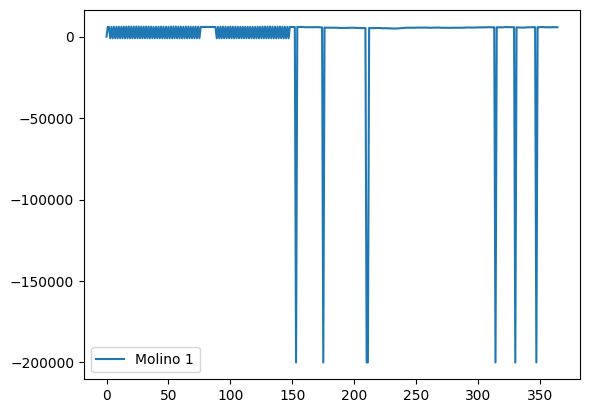

In [ ]:
plt.plot(cashflow, label = 'Molino 1')
#plt.plot(cashflow2, label = 'Molino 2')
plt.legend()
plt.show()